# Plan - Thinking about how to use `dbt` to standardize Zulip chat data
- [x] review progress from last class -- overview of `dbt` and `dbt`'s `profiles.yml` file
- [x] review how to look at a `duckdb` database using python and `pandas` (and maybe `polars`)
- [ ] create a `dbt` model (a `sql file`) to create a table in `duckdb` from a `json` file containing the Zulip message data from class
  - [x] try the smallest possible test for the SQL query to create a table in duckdb
  - [x] try using jupyter notebook cell magic to run the SQL query using duckdb 
  - [x] figure out the malformed json error in duckdb
  - [ ] translate the SQL query into a `dbt` model (a `sql` file)


## Self-monitoring
- 230410 - 3 - eustress - planning one hour of live coding with class
- 230410 - 10:12 AM EST - 3.3 - feel okay at having broken down something complicated into smaller steps and using the outline to further reduce cognitive load and increase focus
- 230410 - 10:20 AM EST - 3.5 - weird error from following documentation, and using the json downloaded from zulip.com servers, so not sure whether i'm the problem (or we are the problem) or the documentation is the problem
- 230410 - 10:57 AM - 3.8 - frustration mounting - no sense of closure, we are SO CLOSE it feels to loading the Zulip data but are not there yet! 

## Shortcuts used
- `alt + c` to check a markdown checkbox

## Smallest possible test for the SQL query to create the table in duckdb
https://duckdb.org/docs/guides/python/jupyter.html


In [2]:
# smallest possible test case for SQL query using jupyter notebook cell magic commands
import duckdb
import pandas as pd

# Import jupysql Jupyter extension to create SQL cells
%load_ext sql

In [3]:
# Set configrations on jupysql to directly output data to Pandas and to simplify the output that is printed to the notebook.
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

In [4]:
# Connect jupysql to DuckDB using a SQLAlchemy-style connection string. Either connect to an in memory DuckDB, or a file backed db.
%sql duckdb:///:memory:

### Current stage: trying to do smallest possible test to load json file into duckdb
- [x] look at duckdb documentation for how to load a json file into duckdb - https://duckdb.org/docs/guides/import/json_import
- [x] look at duckdb documentation for how to load a csv file into duckdb - https://duckdb.org/docs/guides/import/csv_import.html
- [ ] try using `read_json_auto` to load the json file into duckdb

In [5]:
SELECT * FROM read_json_auto('input.json');

SyntaxError: invalid syntax (236610183.py, line 1)

```Querying DuckDB

Single line SQL queries can be run using %sql at the start of a line. Query results will be displayed as a Pandas DF.
````

In [6]:
%sql SELECT 'Off and flying!' as a_duckdb_column

,a_duckdb_column
0,Off and flying!


### SMall test to understand whether this is truly a pandas dataframe!

https://stackoverflow.com/questions/27952428/programmatically-get-current-ipython-notebook-cell-output

Small test complete! It IS a pandas dataframe, and also appears to interact with the structured query language. 

In [7]:
_


,a_duckdb_column
0,Off and flying!


In [8]:
df = _


In [9]:
df


,a_duckdb_column
0,Off and flying!


In [10]:
df.describe()


,a_duckdb_column
count,1
unique,1
top,Off and flying!
freq,1


In [11]:
df.values.tolist()[0][0]


'Off and flying!'

In [12]:
type(df.values.tolist()[0][0])


str

### Current stage: trying to execute read_json_auto command from duckdb documentation in jupyter to interact with the resulting pandas dataframe

In [13]:
%sql SELECT * FROM read_json_auto('input.json');

(duckdb.IOException) IO Error: No files found that match the pattern "input.json"
[SQL: SELECT * FROM read_json_auto('input.json');]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [14]:
%sql SELECT * FROM read_json_auto('./data/datathinking.zulipchat.com/raw/messages-000001.json');

(duckdb.InvalidInputException) Invalid Input Error: Malformed JSON in file "./data/datathinking.zulipchat.com/raw/messages-000001.json", at byte 2097149 in object 2: unexpected end of data. Try increasing "maximum_object_size".
[SQL: SELECT * FROM read_json_auto('./data/datathinking.zulipchat.com/raw/messages-000001.json');]
(Background on this error at: https://sqlalche.me/e/14/f405)


### Debugging! duckdb.InvalidInputExecption - "Malformed JSON in file"
cognitive walkthrough:
- we downloaded messages-000001.json from zulip.com
- now another software tool is complaining about the json file
- is this our fault? or is this the fault of the software tool?
  - there was only 1 google result for the error message, so it seems like the evidence is mounting that this may be a bug!
  - we are also issuing a command to `duckdb` that includes the word `auto`, which is a hint that we are not specifying the exact format of the json file, and that `duckdb` is trying to guess the format of the json file
  - `auto`, is a "verbal event" (in jargon) -- that is associated with a meaning -- "automatic", in the English language. Automatic means "working by itself with little or no direct human control." (https://www.google.com/search?client=firefox-b-1-d&q=automatic+meaning)
  - this means that if we accept the output of anything with `auto` in it and find ourselves confused, doing many things, we should question whether the name of the thing we are using is appropriate.
  - if we accept this stimulus and the attendant emotional response (confusion, doing many things), we should question whether the name of the thing we are using is appropriate. if we accept it, we would be reinforcing this behavior, and dull our sense of the meaning of the word `auto` in the future, which is unhelpful to ourselves and our fellow learners. 
- let's find out! is fault even the right thing to call it?

Steps / thinking on things we can `do` to debug this error:
- [x] read the error message in detail
- [x] google the error message
  - [x] https://www.google.com/search?client=firefox-b-1-d&q=Try+increasing+%22maximum_object_size%22+python+duckdb -- only 1 result!
- [x] google `maximum_object_size`: https://www.google.com/search?client=firefox-b-1-d&q=maximum_object_size+duckdb
- [x] found and skimmed `JSON Loading`, which is DIFFERENT than `read_json_auto` - https://duckdb.org/docs/data/json/overview.html
- [x] think about it
- [x] ready to do something about it and switch to trying to use something OTHER than `read_json_auto`? (i think so  -- and i feel so )

### Current stage: trying to execute `read_json` command from duckdb documentation in jupyter to interact with the resulting pandas dataframe

In [15]:
%sql SELECT * FROM 'todos.json';

(duckdb.IOException) IO Error: No files found that match the pattern "todos.json"
[SQL: SELECT * FROM 'todos.json' ;]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [16]:
%sql SELECT * FROM './data/datathinking.zulipchat.com/raw/messages-000001.json';

(duckdb.InvalidInputException) Invalid Input Error: Malformed JSON in file "./data/datathinking.zulipchat.com/raw/messages-000001.json", at byte 2097149 in object 2: unexpected end of data. Try increasing "maximum_object_size".
[SQL: SELECT * FROM './data/datathinking.zulipchat.com/raw/messages-000001.json' ;]
(Background on this error at: https://sqlalche.me/e/14/f405)


In [17]:
%sql
# -- read_json with custom options
SELECT *
FROM read_json('todos.json',
               json_format='array_of_records',
               columns={userId: 'UBIGINT',
                        id: 'UBIGINT',
                        title: 'VARCHAR',
                        completed: 'BOOLEAN'});

SyntaxError: invalid syntax (1470270294.py, line 3)

Nota bene: looks like we need TWO percentage signs. 

Nota bene: this is an example of thinking like a computer instead of a human. 

In [18]:
%%sql
-- read_json with custom options
SELECT *
FROM read_json('todos.json',
               json_format='array_of_records',
               columns={userId: 'UBIGINT',
                        id: 'UBIGINT',
                        title: 'VARCHAR',
                        completed: 'BOOLEAN'});

(duckdb.IOException) IO Error: No files found that match the pattern "todos.json"
[SQL: -- read_json with custom options
SELECT *
FROM read_json('todos.json',
               json_format='array_of_records',
               columns={userId: 'UBIGINT',
                        id: 'UBIGINT',
                        title: 'VARCHAR',
                        completed: 'BOOLEAN'});]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [19]:
%%sql
-- read_json with custom options
SELECT *
FROM read_json('./data/datathinking.zulipchat.com/raw/messages-000001.json',
               json_format='array_of_records',
               columns={userId: 'UBIGINT',
                        id: 'UBIGINT',
                        title: 'VARCHAR',
                        completed: 'BOOLEAN'});

(duckdb.InvalidInputException) Invalid Input Error: Malformed JSON in file "./data/datathinking.zulipchat.com/raw/messages-000001.json", at byte 2097149 in object 2: unexpected end of data. Try increasing "maximum_object_size".
(Background on this error at: https://sqlalche.me/e/14/f405)


Self-gaslighting or self-compassion? I'm not sure. We are getting more evidence online that this statement might be incorrect in the documentation:

> This will work correctly in most situations, and should be the first option attempted. In rare situations where the JSON reader cannot figure out the correct configuration, it is possible to manually configure the JSON reader to correctly parse the JSON file.

Based on the 1 google search result for the error message (`Try increasing "maximum_object_size"`), and reading this forum with 2+ usernames with the same error message (https://news.ycombinator.com/item?id=35009612), it seems like this is a bug in the software.



### Current stage: trying to understand 1 parameter of the `read_json` command from duckdb documentation in jupyter to interact with the resulting pandas dataframe

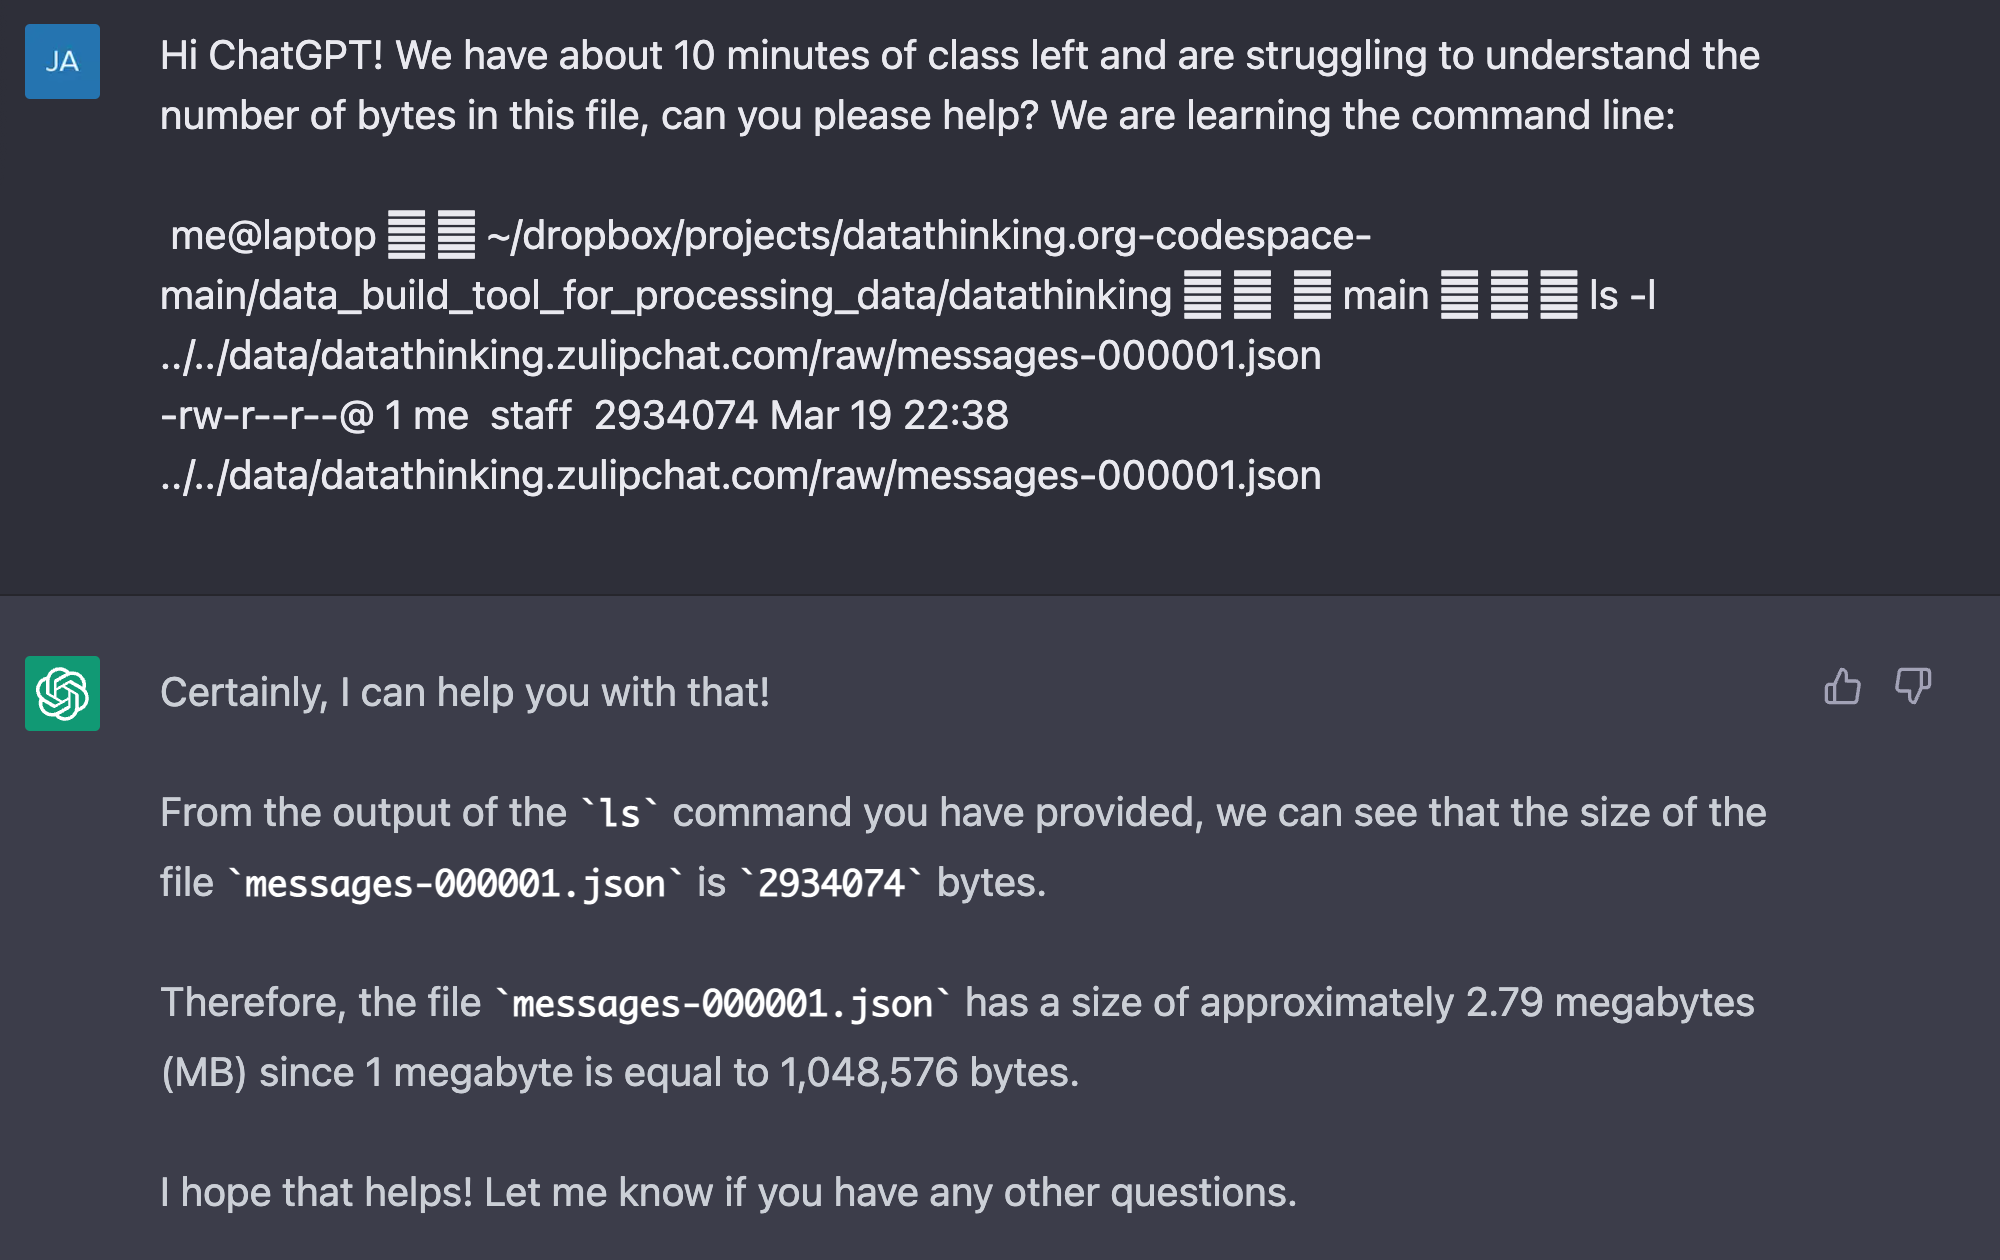

How large should we make the number of bytes? 

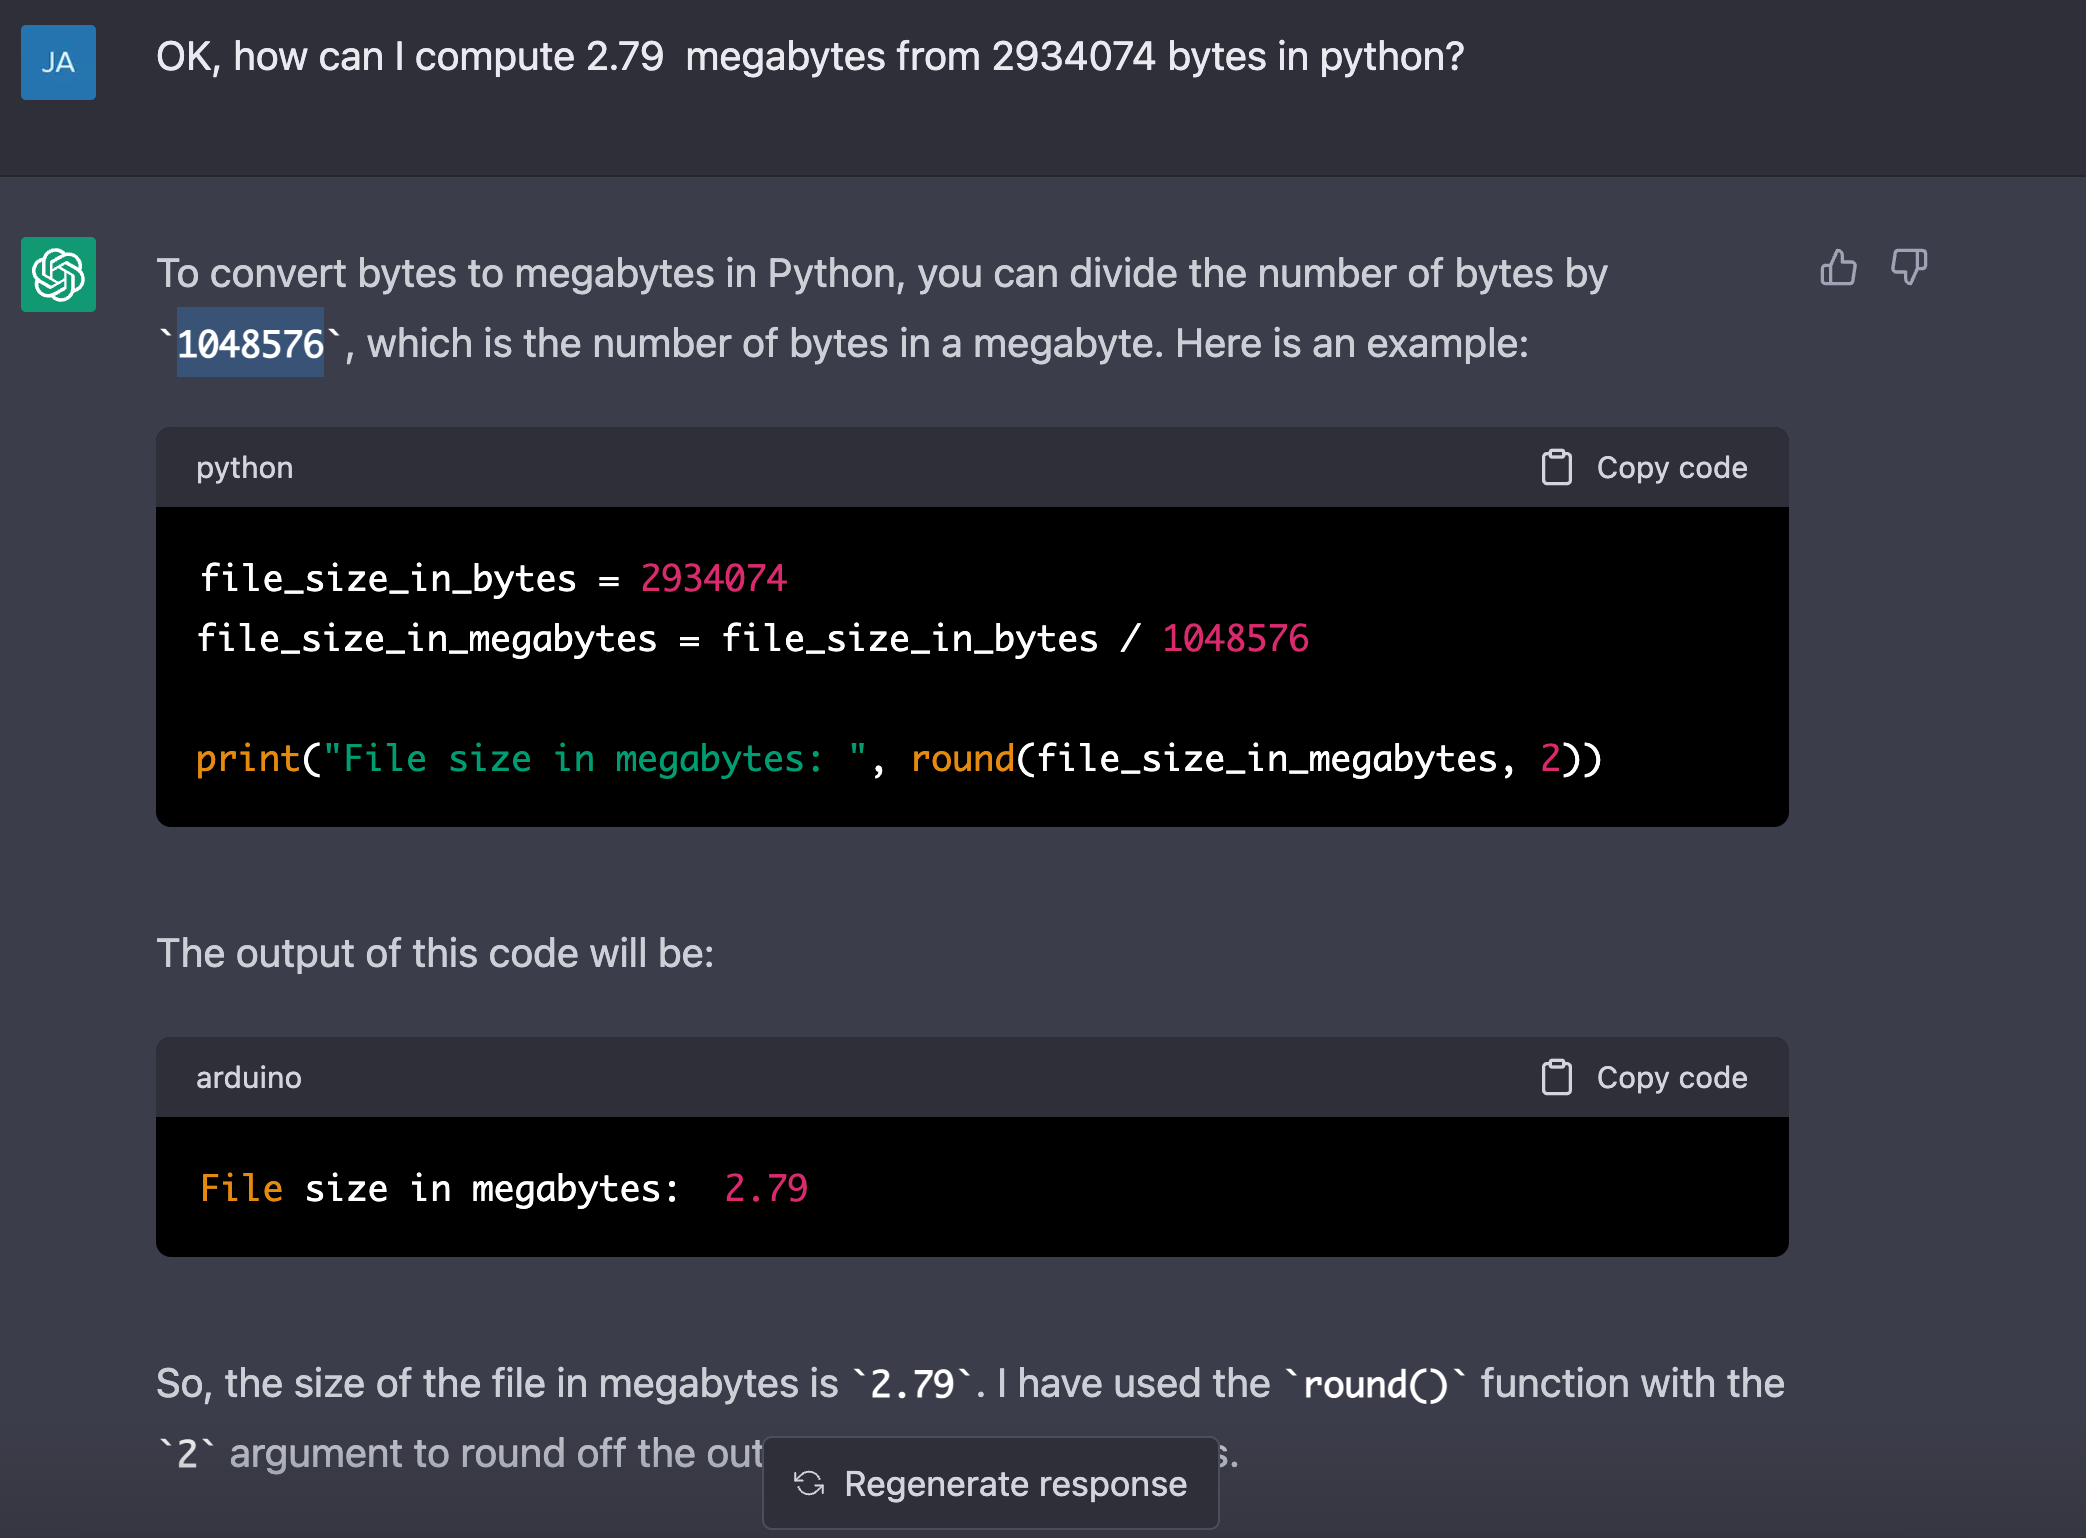

In [20]:
file_size_in_bytes = 2934074

file_size_in_megabytes = file_size_in_bytes / 1024 / 1024

print("The file size is: " + str(file_size_in_megabytes) + " MB")


The file size is: 2.7981510162353516 MB


Let's make the maximum object size parameter twice the size of the Zulip chat messages!

How to reference python variables in jupyter sql magic? 

https://github.com/catherinedevlin/ipython-sql/issues/120

In [21]:
%%sql
-- read_json with custom options
SELECT *
FROM read_json('./data/datathinking.zulipchat.com/raw/messages-000001.json',
               maximum_object_size=:file_size_in_bytes);

(duckdb.InvalidInputException) Invalid Input Error: Attempting to execute an unsuccessful or closed pending query result
Error: Binder Error: read_json "columns" parameter is required when auto_detect is false
[SQL: -- read_json with custom options
SELECT *
FROM read_json('./data/datathinking.zulipchat.com/raw/messages-000001.json',
               maximum_object_size=?);]
[parameters: (2934074,)]
(Background on this error at: https://sqlalche.me/e/14/f405)


/opt/homebrew/anaconda3/envs/datathinking.org/lib/python3.11/site-packages/sql/command.py:109: FutureWarning: Variable substitution with $var and {var} has been deprecated and will be removed in a future version. Use {{var}} instead. To remove this, see: https://jupysql.ploomber.io/en/latest/howto.html#ignore-deprecation-warnings
  warnings.warn(msg, FutureWarning)


### Current stage, going back to `read_json_auto` armed with our new knowledge of the `maximum_object_size` parameter

In [22]:
%sql SELECT * FROM read_json_auto('./data/datathinking.zulipchat.com/raw/messages-000001.json', maximum_object_size=:file_size_in_bytes);

,zerver_message,zerver_usermessage
0,"[{'id': 299488052, 'sender': 100007, 'recipien...","[{'id': 8257034355, 'user_profile': 544719, 'm..."


In [23]:
df_messages_1 = _


In [24]:
df_messages_1.describe()


,zerver_message,zerver_usermessage
count,1,1
unique,1,1
top,"[{'id': 299488052, 'sender': 100007, 'recipien...","[{'id': 8257034355, 'user_profile': 544719, 'm..."
freq,1,1


### Current stage: `read_json_auto` did not work again, so let's try asking chatgpt for help populating the `read_json` command columns parameters!

%%sql
-- read_json with custom options
SELECT *
FROM read_json('./data/datathinking.zulipchat.com/raw/messages-000001.json',
               maximum_object_size=:file_size_in_bytes);

In [25]:
%%sql 
SELECT *
FROM read_json('./data/datathinking.zulipchat.com/raw/messages-000001.json',
               json_format='records',
               maximum_object_size=:file_size_in_bytes,
               columns={id: 'UBIGINT',
                        sender: 'UBIGINT',
                        recipient: 'UBIGINT',
                        realm: 'UBIGINT',
                        subject: 'VARCHAR',
                        content: 'VARCHAR',
                        rendered_content: 'VARCHAR',
                        rendered_content_version: 'INTEGER',
                        date_sent: 'TIMESTAMP',
                        sending_client: 'UBIGINT',
                        last_edit_time: 'TIMESTAMP',
                        edit_history: 'VARCHAR',
                        has_attachment: 'BOOLEAN',
                        has_image: 'BOOLEAN',
                        has_link: 'BOOLEAN',
                        search_tsvector: 'VARCHAR'});

/opt/homebrew/anaconda3/envs/datathinking.org/lib/python3.11/site-packages/sql/command.py:109: FutureWarning: Variable substitution with $var and {var} has been deprecated and will be removed in a future version. Use {{var}} instead. To remove this, see: https://jupysql.ploomber.io/en/latest/howto.html#ignore-deprecation-warnings
  warnings.warn(msg, FutureWarning)


,id,sender,recipient,realm,subject,content,rendered_content,rendered_content_version,date_sent,sending_client,last_edit_time,edit_history,has_attachment,has_image,has_link,search_tsvector
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [27]:
df_messages_2 = _


In [28]:
df_messages_2


,id,sender,recipient,realm,subject,content,rendered_content,rendered_content_version,date_sent,sending_client,last_edit_time,edit_history,has_attachment,has_image,has_link,search_tsvector
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


### Current stage: `read_json` is difficult to use, so let's read about the `json_format` and requirements for the columns parameter 

Steps: 
- [ ] skim https://duckdb.org/docs/data/json/overview.html
- [ ] understand options for `json_format` parameter


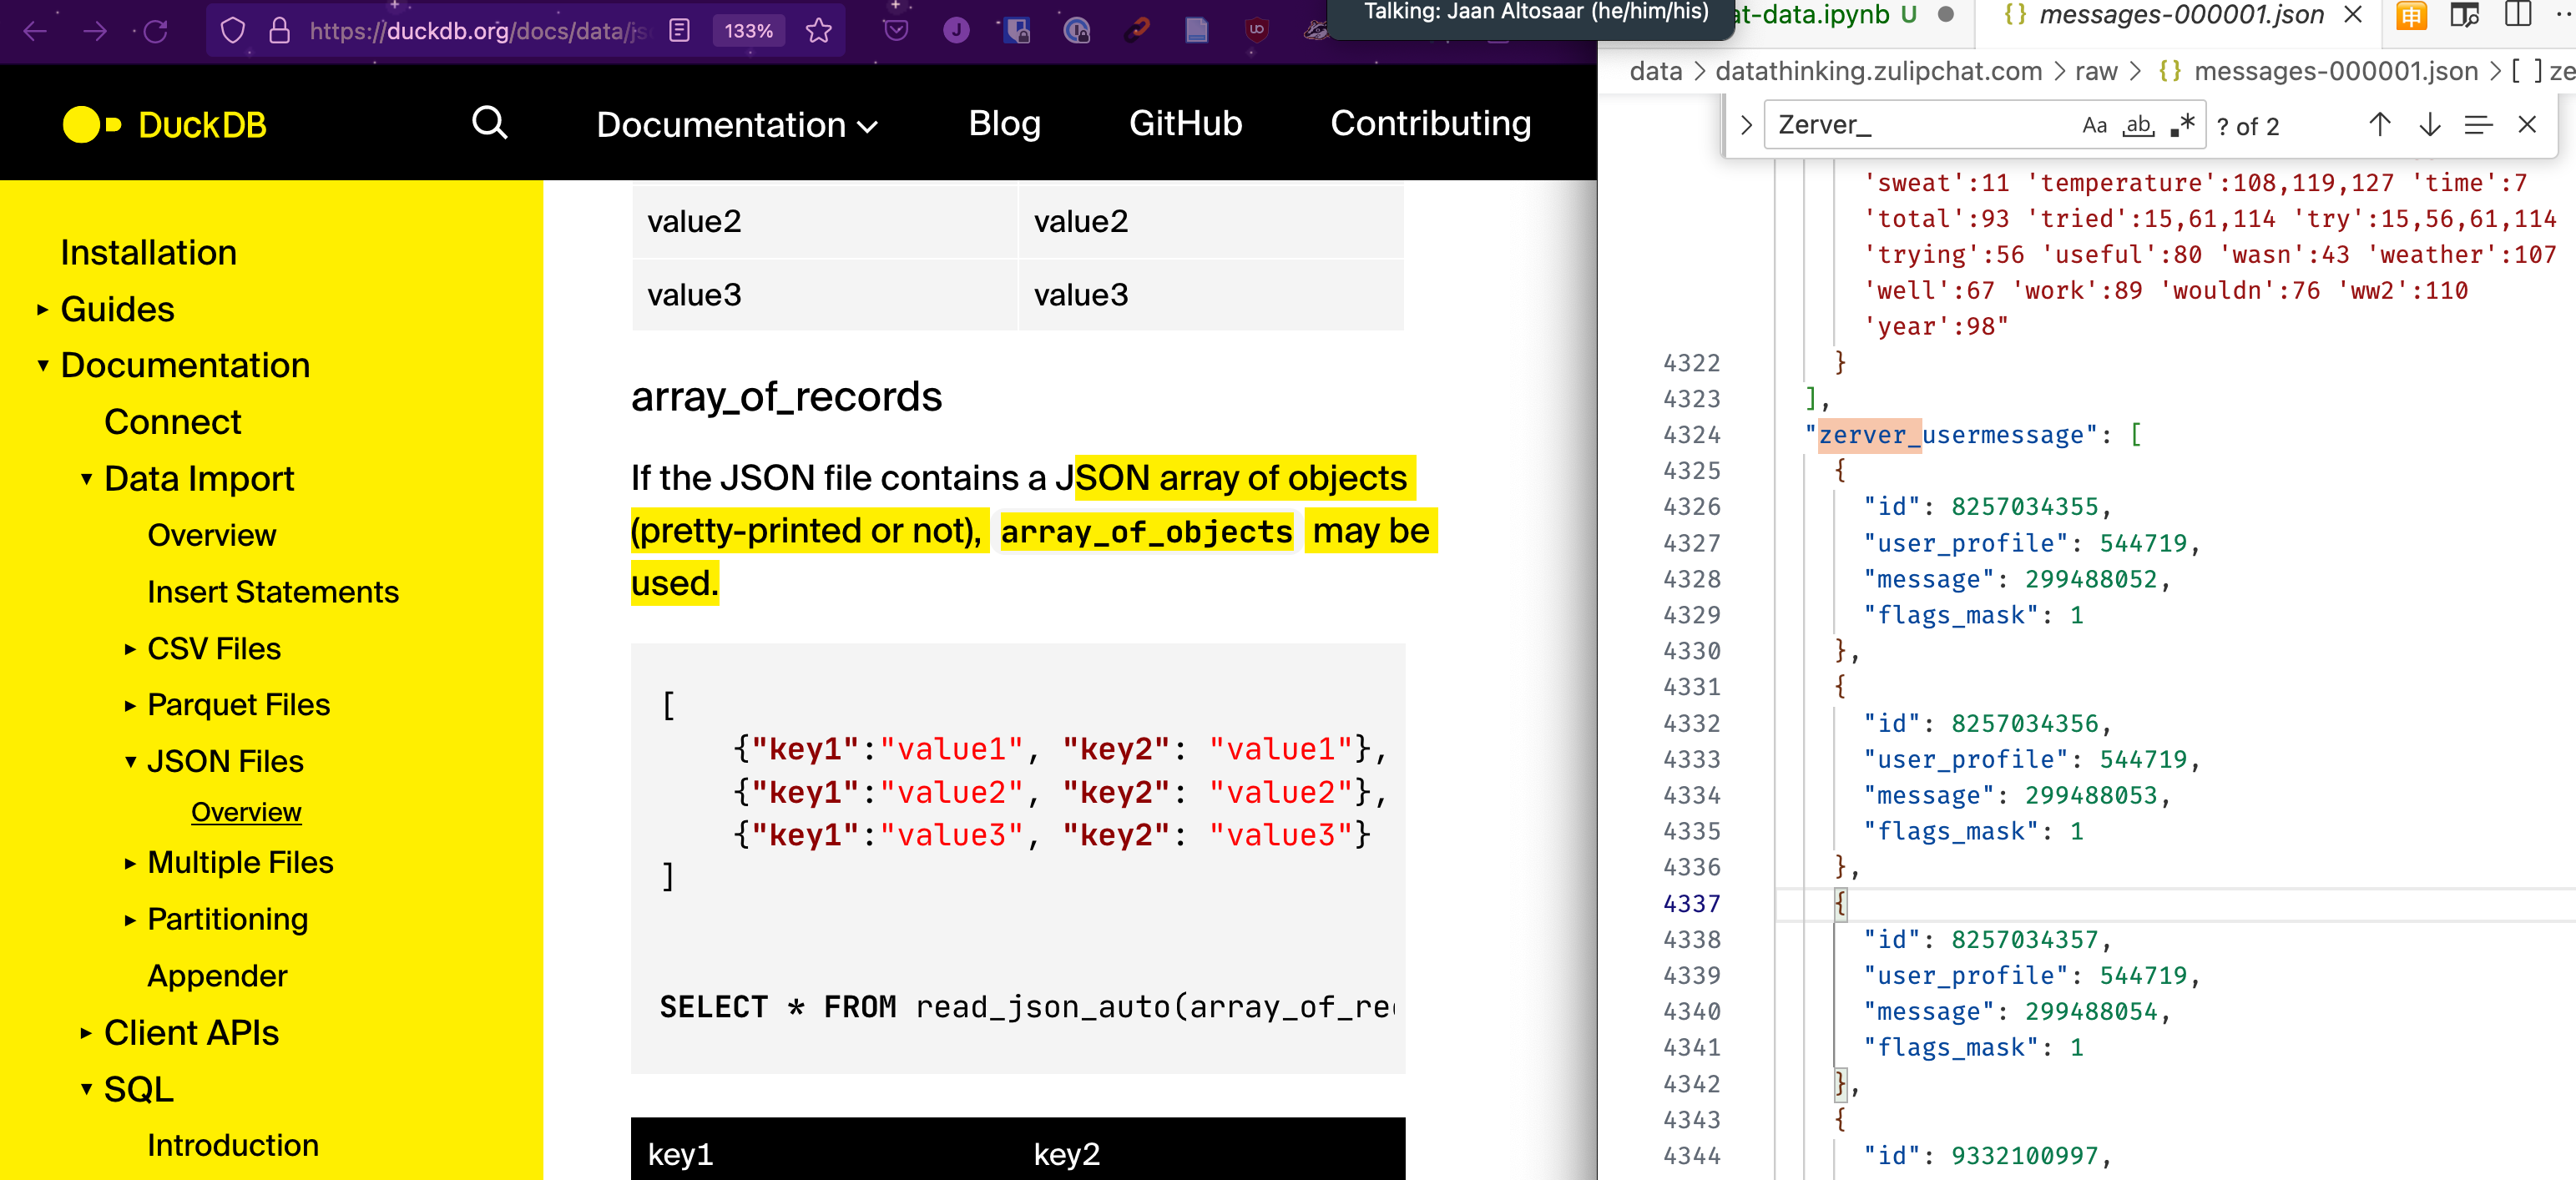


In [29]:
%%sql 
SELECT *
FROM read_json('./data/datathinking.zulipchat.com/raw/messages-000001.json',
               json_format='array_of_objects',
               maximum_object_size=:file_size_in_bytes,
               columns={id: 'UBIGINT',
                        sender: 'UBIGINT',
                        recipient: 'UBIGINT',
                        realm: 'UBIGINT',
                        subject: 'VARCHAR',
                        content: 'VARCHAR',
                        rendered_content: 'VARCHAR',
                        rendered_content_version: 'INTEGER',
                        date_sent: 'TIMESTAMP',
                        sending_client: 'UBIGINT',
                        last_edit_time: 'TIMESTAMP',
                        edit_history: 'VARCHAR',
                        has_attachment: 'BOOLEAN',
                        has_image: 'BOOLEAN',
                        has_link: 'BOOLEAN',
                        search_tsvector: 'VARCHAR'});

(duckdb.InvalidInputException) Invalid Input Error: Attempting to execute an unsuccessful or closed pending query result
Error: Invalid Input Error: "json_format" must be one of ['records', 'array_of_records', 'json', 'array_of_json', 'auto']
[SQL: SELECT *
FROM read_json('./data/datathinking.zulipchat.com/raw/messages-000001.json',
               json_format='array_of_objects',
               maximum_object_size=?,
               columns={id: 'UBIGINT',
                        sender: 'UBIGINT',
                        recipient: 'UBIGINT',
                        realm: 'UBIGINT',
                        subject: 'VARCHAR',
                        content: 'VARCHAR',
                        rendered_content: 'VARCHAR',
                        rendered_content_version: 'INTEGER',
                        date_sent: 'TIMESTAMP',
                        sending_client: 'UBIGINT',
                        last_edit_time: 'TIMESTAMP',
                        edit_history: 'VARCHAR',
       

/opt/homebrew/anaconda3/envs/datathinking.org/lib/python3.11/site-packages/sql/command.py:109: FutureWarning: Variable substitution with $var and {var} has been deprecated and will be removed in a future version. Use {{var}} instead. To remove this, see: https://jupysql.ploomber.io/en/latest/howto.html#ignore-deprecation-warnings
  warnings.warn(msg, FutureWarning)


### NB: potential bug report

Documentation - https://duckdb.org/docs/data/json/overview.html -- says that `array_of_objects` can be used as the `json_format` parameter, but it does not work and requires other settings! 

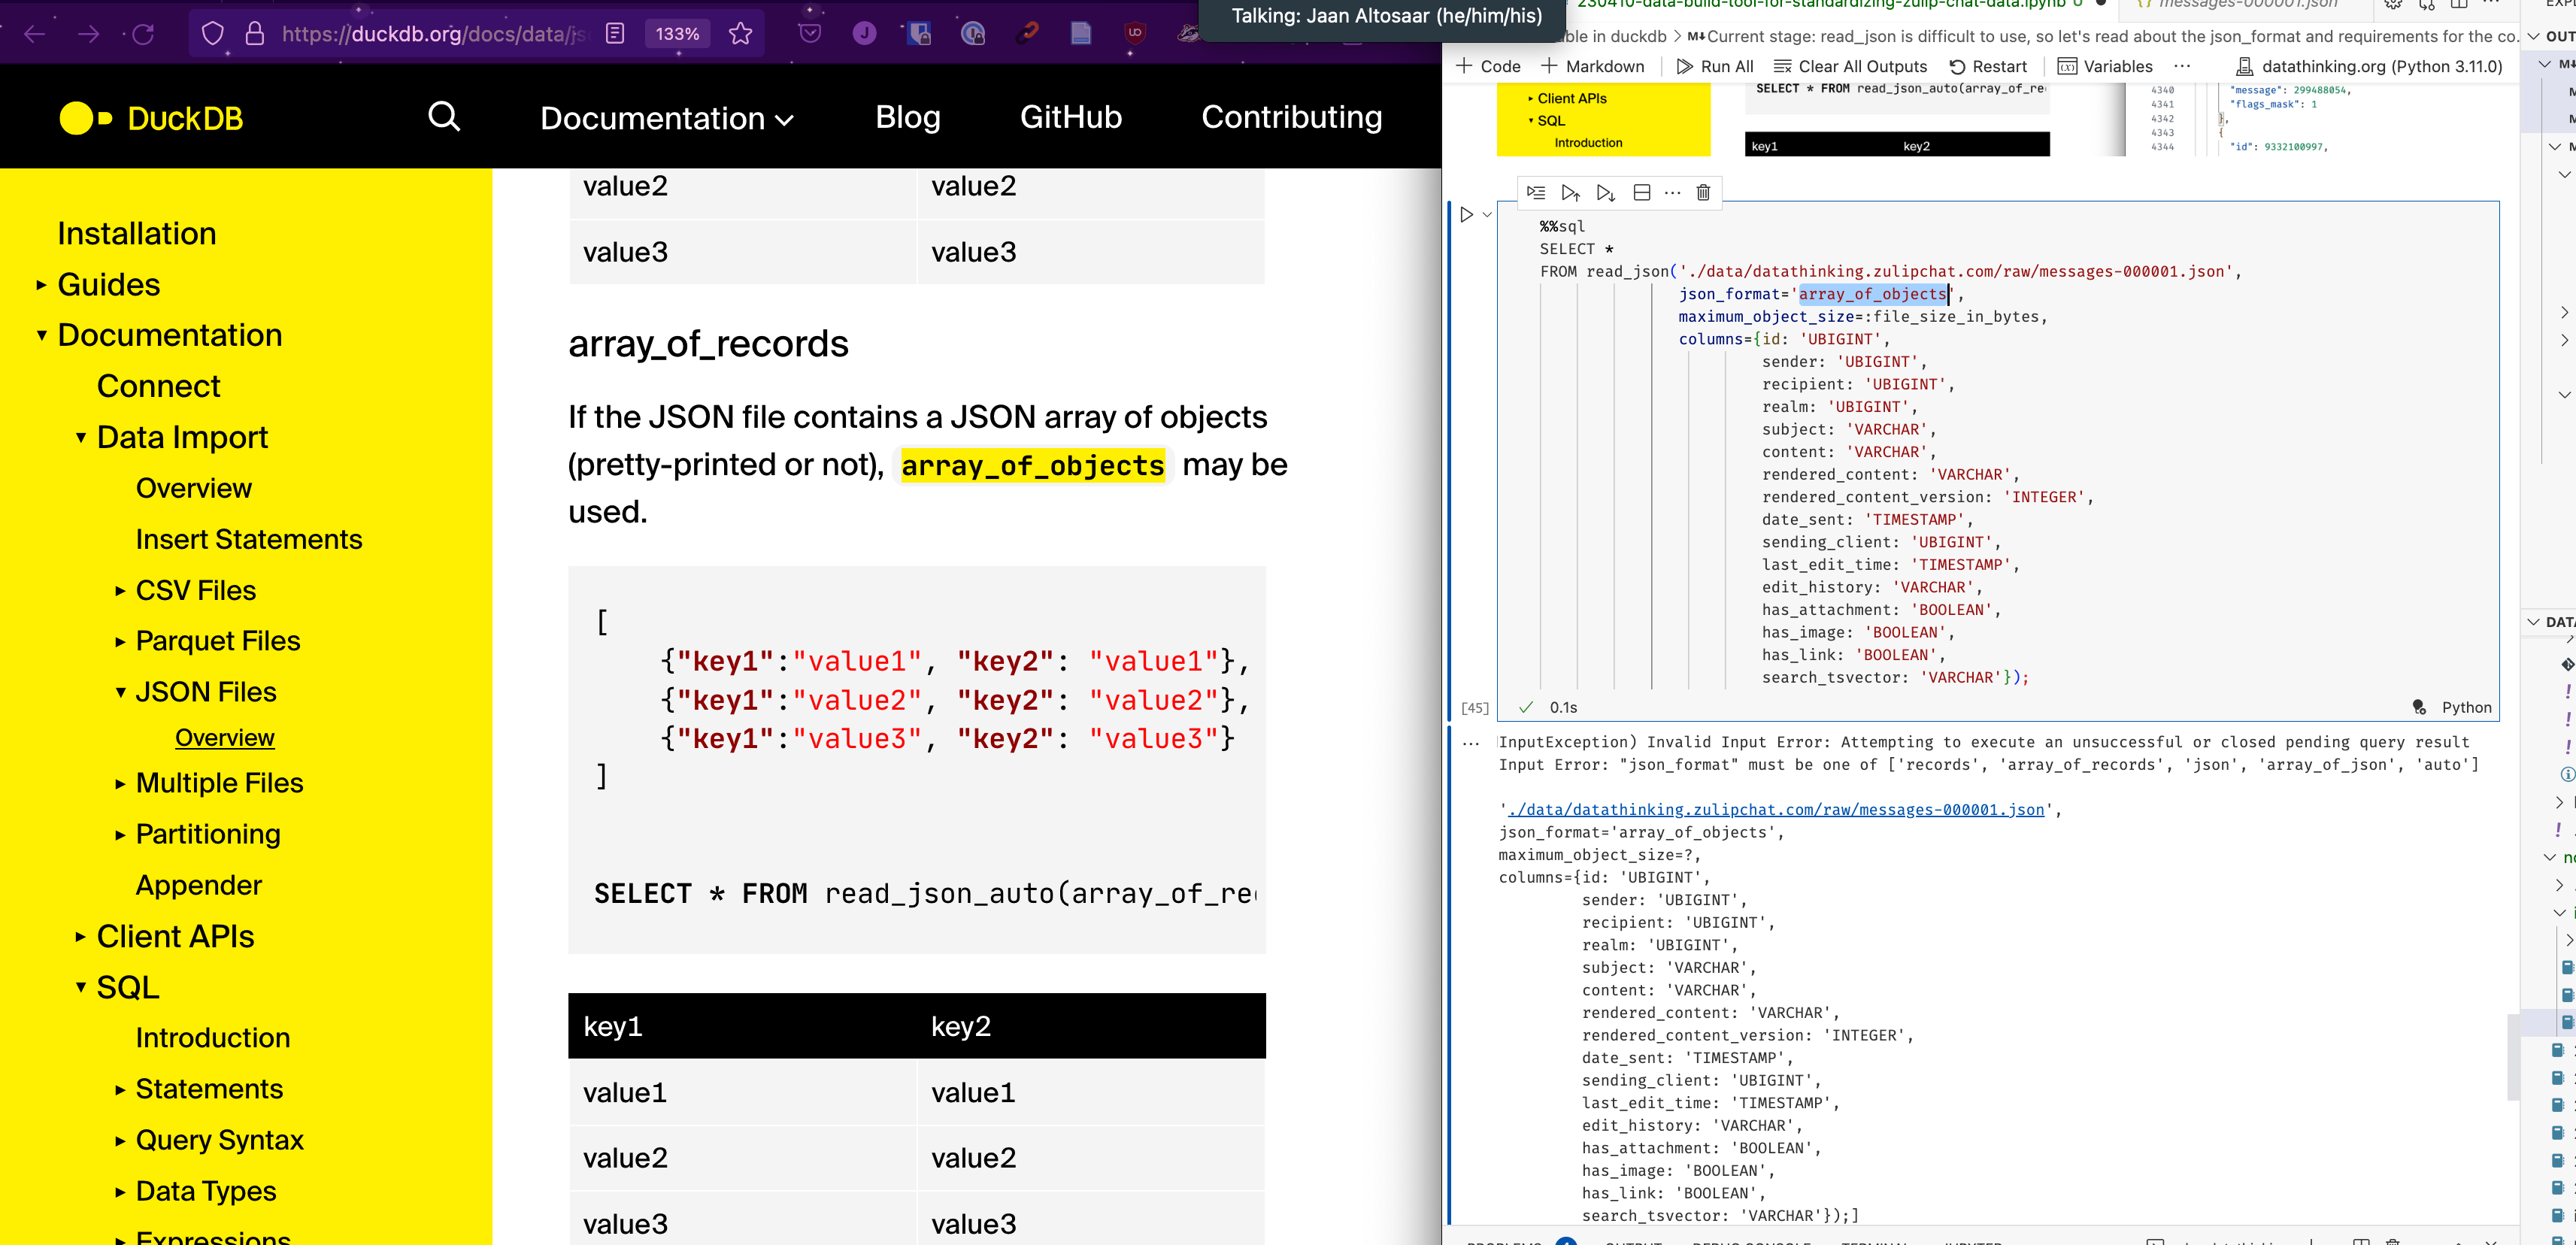

### Current stage: to check whether we might be experiencing a bug, let's check the duckdb version!

In [30]:
duckdb.__version__


'0.7.2-dev1637'

### Current stage: `read_json` paramaters are limited to `['records', 'array_of_records', 'json', 'array_of_json', 'auto']`, so we can try each in succession to understand their limitations

- [ ] try `records`
- [ ] try `array_of_records`
- [ ] try `json`
- [ ] try `array_of_json`
- [ ] try `auto`

In [31]:
%%sql 
SELECT *
FROM read_json('./data/datathinking.zulipchat.com/raw/messages-000001.json',
               json_format='array_of_records',
               maximum_object_size=:file_size_in_bytes,
               columns={zerver_message: ,});

(duckdb.ParserException) Parser Error: syntax error at or near ","
LINE 5: ...ELECT *
FROM read_json('./data/datathinking.zulipchat.com/raw/messages-000001.json',
               json_format='array_of_records',
               maximum_object_size=?,
               columns={zerver_message: ,});
                                                  ^
[SQL: SELECT *
FROM read_json('./data/datathinking.zulipchat.com/raw/messages-000001.json',
               json_format='array_of_records',
               maximum_object_size=?,
               columns={zerver_message: ,});]
[parameters: (2934074,)]
(Background on this error at: https://sqlalche.me/e/14/f405)


### Current stage: `read_json` requires a lot of manual work, and it seems our `json` data might be "nested", so need to specify nesting structure

- [ ] reading about `STRUCT` format in duckdb: https://duckdb.org/docs/extensions/json.html

In [32]:
%%sql 
SELECT *
FROM read_json('./data/datathinking.zulipchat.com/raw/messages-000001.json',
               json_format='array_of_records',
               maximum_object_size=:file_size_in_bytes,
               columns={zerver_message: STRUCT<id: BIGINT>});

(duckdb.ParserException) Parser Error: syntax error at or near ":"
LINE 5: ...ROM read_json('./data/datathinking.zulipchat.com/raw/messages-000001.json',
               json_format='array_of_records',
               maximum_object_size=?,
               columns={zerver_message: STRUCT<id: BIGINT>});
                                                  ^
[SQL: SELECT *
FROM read_json('./data/datathinking.zulipchat.com/raw/messages-000001.json',
               json_format='array_of_records',
               maximum_object_size=?,
               columns={zerver_message: STRUCT<id: BIGINT>});]
[parameters: (2934074,)]
(Background on this error at: https://sqlalche.me/e/14/f405)


### Current stage: `read_json` requires a lot of effort to specify the `columns` parameter -- let's use the duckdb blog example to see whether we can use the `STRUCT` data type

https://duckdb.org/2023/03/03/json.html#handling-inconsistent-json-schemas



### Current stage: make it easier to ask chatgpt to help, by creating a tiny version of the zulip message data in json

test-data.json:
```json
{
  "zerver_message": [
    {
      "id": 299488052,
      "sender": 100007,
      "recipient": 924073,
      "realm": 47304,
      "subject": "topic demonstration",
      "content": "This is a message on stream #**general** with the topic `topic demonstration`.",
      "rendered_content": "<p>This is a message on stream <a class=\"stream\" data-stream-id=\"345278\" href=\"/#narrow/stream/345278-general\">#general</a> with the topic <code>topic demonstration</code>.</p>",
      "rendered_content_version": 1,
      "date_sent": 1663549367.691131,
      "sending_client": 1002,
      "last_edit_time": null,
      "edit_history": null,
      "has_attachment": false,
      "has_image": false,
      "has_link": true,
      "search_tsvector": "'demonstrate':2,14 'demonstration':2,14 'general':9 'message':6 'stream':8 'topic':1,12,13"
    },
    {
      "id": 299488053,
      "sender": 100007,
      "recipient": 924073,
      "realm": 47304,
      "subject": "topic demonstration",
      "content": "Topics are a lightweight tool to keep conversations organized. You can learn more about topics at [Streams and topics](/help/streams-and-topics).",
      "rendered_content": "<p>Topics are a lightweight tool to keep conversations organized. You can learn more about topics at <a href=\"/help/streams-and-topics\">Streams and topics</a>.</p>",
      "rendered_content_version": 1,
      "date_sent": 1663549367.706309,
      "sending_client": 1002,
      "last_edit_time": null,
      "edit_history": null,
      "has_attachment": false,
      "has_image": false,
      "has_link": true,
      "search_tsvector": "'conversation':10 'demonstrate':2 'demonstration':2 'keep':9 'learn':14 'lightweight':6 'organize':11 'organized':11 'stream':19 'tool':7 'topic':1,3,17,21"
    }
  ],
  "zerver_usermessage": [
    {
      "id": 8257034355,
      "user_profile": 544719,
      "message": 299488052,
      "flags_mask": 1
    },
    {
      "id": 8257034356,
      "user_profile": 544719,
      "message": 299488053,
      "flags_mask": 1
    }
  ]
}
```

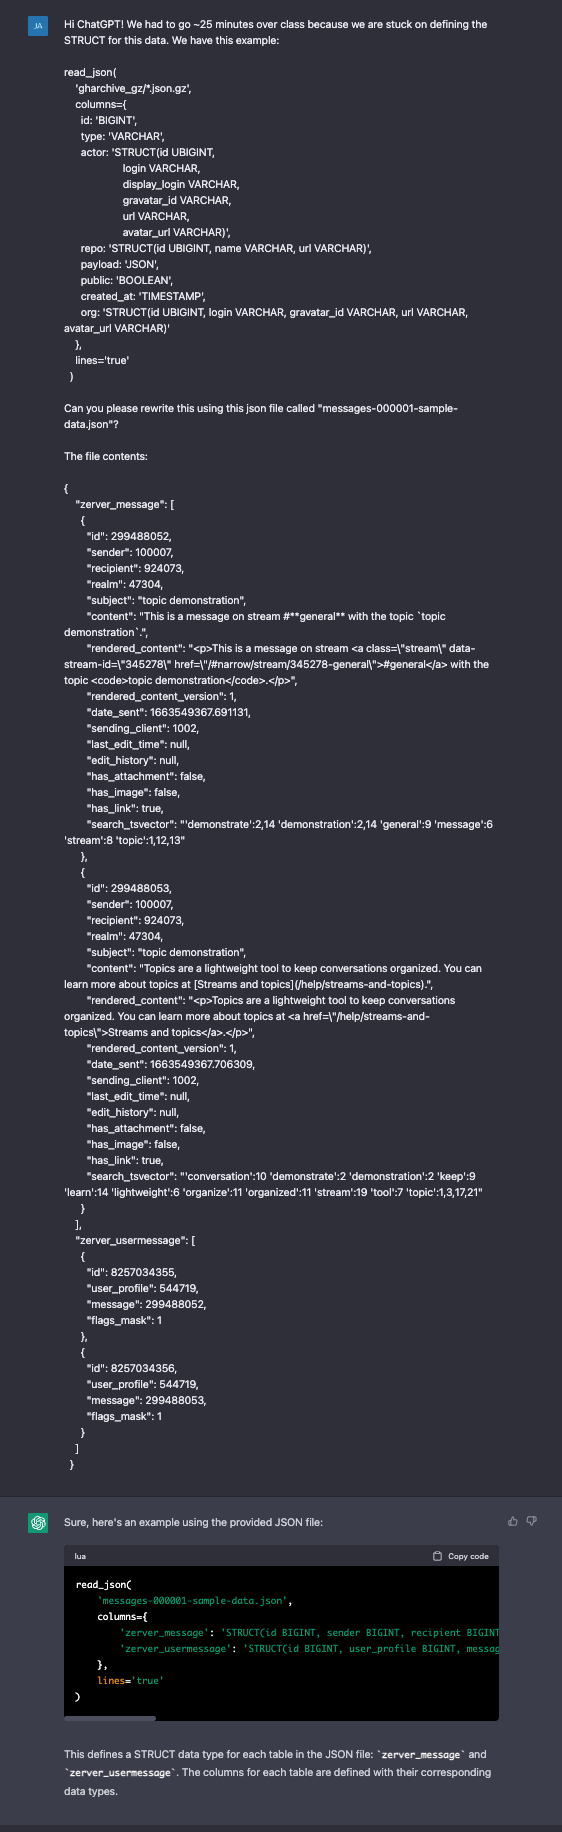

In [33]:
%%sql 
SELECT *
FROM read_json('./data/datathinking.zulipchat.com/raw/messages-000001.json',
               json_format='array_of_records',
               maximum_object_size=:file_size_in_bytes,
               columns={
                   'zerver_message': 'STRUCT(id BIGINT, 
                                             sender BIGINT, 
                                             recipient BIGINT, 
                                             realm BIGINT, 
                                             subject VARCHAR, 
                                             content VARCHAR, rendered_content VARCHAR, rendered_content_version BIGINT, 
                                             date_sent TIMESTAMP, sending_client BIGINT, last_edit_time TIMESTAMP, edit_history VARCHAR, has_attachment BOOLEAN, has_image BOOLEAN, 
                                             has_link BOOLEAN, search_tsvector VARCHAR)',
                    'zerver_usermessage': 'STRUCT(id BIGINT, 
                                                  user_profile BIGINT, 
                                                  message BIGINT, 
                                                  flags_mask BIGINT)'
                        },
               lines='true'
);

(duckdb.InvalidInputException) Invalid Input Error: Malformed JSON in file "./data/datathinking.zulipchat.com/raw/messages-000001.json", at byte 2 in line 2: unexpected end of data. 
(Background on this error at: https://sqlalche.me/e/14/f405)


In [34]:
file_size_in_bytes * 2


5868148

In [35]:
%%sql 
SELECT *
FROM read_json('./data/datathinking.zulipchat.com/raw/messages-000001.json',
               json_format='array_of_records',
               maximum_object_size=:file_size_in_bytes,
               columns={
                   'zerver_message': 'STRUCT(id BIGINT, 
                                             sender BIGINT, 
                                             recipient BIGINT, 
                                             realm BIGINT, 
                                             subject VARCHAR, 
                                             content VARCHAR, rendered_content VARCHAR, rendered_content_version BIGINT, 
                                             date_sent TIMESTAMP, sending_client BIGINT, last_edit_time TIMESTAMP, edit_history VARCHAR, has_attachment BOOLEAN, has_image BOOLEAN, 
                                             has_link BOOLEAN, search_tsvector VARCHAR)',
                    'zerver_usermessage': 'STRUCT(id BIGINT, 
                                                  user_profile BIGINT, 
                                                  message BIGINT, 
                                                  flags_mask BIGINT)'
                        },
               lines='true'
);

(duckdb.InvalidInputException) Invalid Input Error: Malformed JSON in file "./data/datathinking.zulipchat.com/raw/messages-000001.json", at byte 2 in line 2: unexpected end of data. 
(Background on this error at: https://sqlalche.me/e/14/f405)


submitted a bug: https://github.com/duckdb/duckdb/issues/7015 